In [16]:
from numpy import *
from pylab import *
from scipy.special import * #to use binom in bernstein

In [72]:
## automatize everything with a class
class approx():
    def __init__(self,num,low,up):
        self._low = low
        self._up = up
        self._x = linspace(self._low,self._up,1025)
        self._n = num
        self.Pn = zeros((self._n + 1,len(self._x)))
    def points(self,arg):
        if arg=="eqspace":
            self._q = linspace(self._low,self._up,self._n + 1)
        elif arg=="chebishev":
            self._q = zeros(self._n + 1)
            for i in range(self._n + 1):
                self._q[i] = .5*(self._up+self._low)+.5*(self._up-self._low)*cos((2*i+1)*pi/(2*self._n+2))
        else:
            raise ValueError("arg of points not valid")
    def method(self,arg):
        if arg=="lagrange":
            for i in range(self._n + 1):
                self.Pn[i] = product([(self._x-self._q[j])/(self._q[i]-self._q[j]) for j in range(self._n+1) if j!=i ], axis=0)
        elif arg=="bernstein":
            for i in range(self._n + 1):
                self.Pn[i] = comb(self._n,i)*(((self._x-self._low)/(self._up-self._low))**i)*(1-((self._x-self._low)/(self._up-self._low)))**(self._n-i)
        else:
            raise ValueError("arg of method is not valid")
    def plot(self,f):
        figure(figsize=[7,5])
        s = "plot of " + f.__name__ + " with n = " + str(self._n) + " in [" + str(self._low) + "," + str(self._up) + "]"
        title(s)
        self._F = f(self._x)
        self._p = self.Pn.T.dot(f(self._q))
        _ = plot(self._x,self._F)
        _ = plot(self._q,f(self._q),"ro")
        _ = plot(self._x,self._p)
        print('D_infty error:', max(abs(self._F-self._p)))
    def error(self,f):
        self._F = f(self._x)
        self._p = self.Pn.T.dot(f(self._q))
        return max(abs(self._F-self._p))

D_infty error: 0.028476234871049083


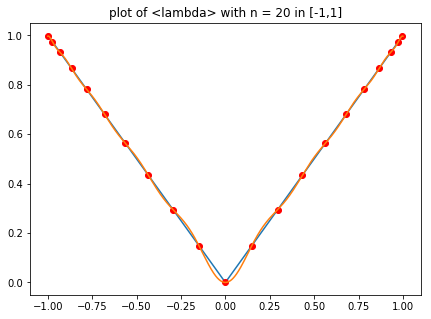

In [75]:
## Chebishev approximation
ll = approx(20,-1,1)
## Chebishev interpolation
ll.points('chebishev')
ll.method('lagrange')
ll.plot(lambda x: abs(x))
#ll.plot(sin)

D_infty error: 0.17619705200195315


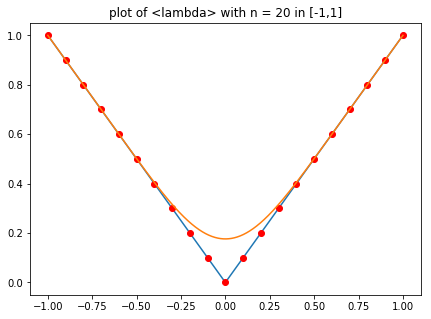

In [76]:
## equally spaced inteprolation
ll.points('eqspace')
ll.method('bernstein')
ll.plot(lambda x: abs(x))
#ll.plot(sin)

In [85]:
def error(func,nstart,nend):
    err1 = []
    err2 = []
    err3 = []
    N = range(nstart,nend+1)
    for n in N:
        ll = approx(n,-1,1)
        ll.points('chebishev')
        ll.method('lagrange')
        err1.append(ll.error(func))
        ll.points('eqspace')
        ll.method('bernstein')
        err2.append(ll.error(func))
        ll.method('lagrange')
        err3.append(ll.error(func))
    semilogy(N,err1)
    semilogy(N,err2)
    semilogy(N,err3)
    _ = legend(['Lagrange chebishev','Bernstein eqspace', 'Lagrange eqspace'])

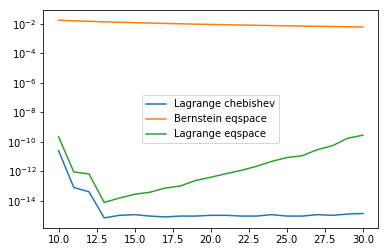

In [89]:
error(sin,10,30)

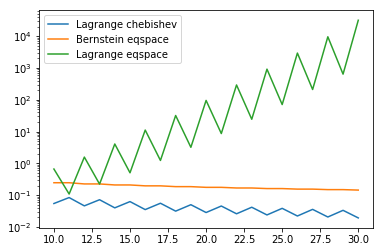

In [88]:
error(abs,10,30)